In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as lb
from sklearn.model_selection import


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
slr = df[['ENGINESIZE','CO2EMISSIONS']]

Text(0, 0.5, 'CO2 Emissions')

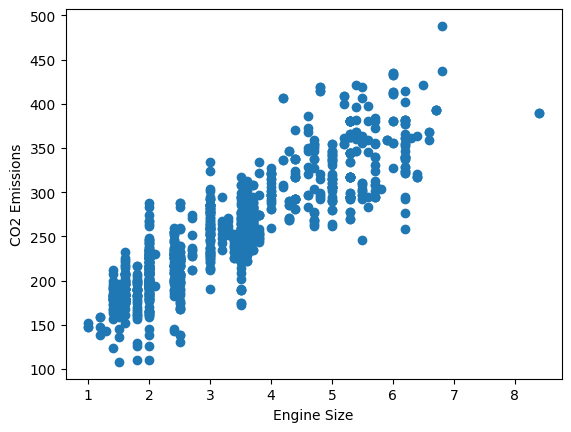

In [12]:
plt.scatter(slr.ENGINESIZE,slr.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [15]:
msk = np.random.rand(len(df)) < 0.8 #Array booleano de true y false
train = slr[msk]
test = slr[~msk]

In [18]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
predictions = regr.predict(test_x)

In [21]:
#calcular errores: MAE MSE y R2

np.mean(np.absolute(predictions-test_y))

np.float64(22.35407241887101)

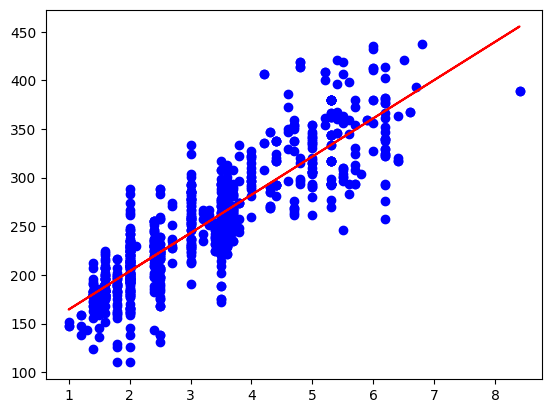

In [24]:
plt.scatter(
    train_x,train_y, color='blue')
plt.plot(train_x,regr.coef_*train_x+regr.intercept_,'-r')